<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/RegresionLogistica_Aula_B28_17_OCT_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión del modelo: 0.88
Matriz de Confusión:
[[14  1]
 [ 4 21]]


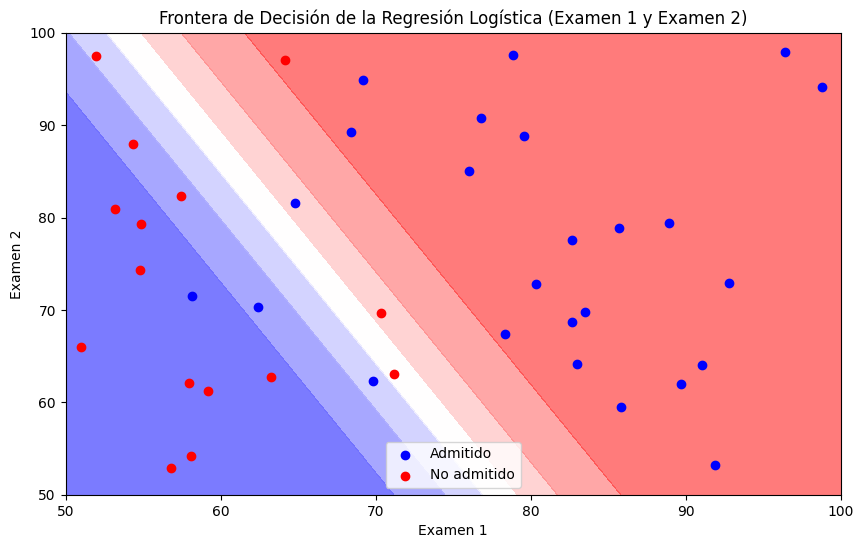

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

# Suprimir la advertencia de nombres de características
warnings.filterwarnings("ignore", category=UserWarning)

# Generar un conjunto de datos ficticio
np.random.seed(0)
n_samples = 200
exam1 = np.random.uniform(50, 100, n_samples)
exam2 = np.random.uniform(50, 100, n_samples)
economic_power = np.random.uniform(2.5, 10, n_samples)
prep_history = np.random.choice([0, 1], n_samples)
admitted = (0.7 * exam1 + 0.3 * exam2 + 0.2 * economic_power + 0.2 * prep_history + np.random.normal(0, 5, n_samples)) > 70

data = pd.DataFrame({'Examen1': exam1, 'Examen2': exam2, 'PoderEconomico': economic_power, 'Preparacion': prep_history, 'Admitido': admitted})

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['Examen1', 'Examen2', 'PoderEconomico', 'Preparacion']]
y = data['Admitido']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de regresión logística
clf = LogisticRegression()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Graficar la frontera de decisión
x1, x2 = np.meshgrid(np.linspace(50, 100, 100), np.linspace(50, 100, 100))
X_new = np.c_[x1.ravel(), x2.ravel()]
economic_power = np.full(X_new.shape[0], 2.5)  # Poder económico mínimo
X_new = np.c_[X_new, economic_power]
prep_history = np.zeros(X_new.shape[0])  # Sin preparación
X_new = np.c_[X_new, prep_history]
y_proba = clf.predict_proba(X_new)
y_decision = y_proba[:, 1].reshape(x1.shape)

plt.figure(figsize=(10, 6))
plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.6)
plt.scatter(X_test[y_test == 1]['Examen1'], X_test[y_test == 1]['Examen2'], c='b', label="Admitido")
plt.scatter(X_test[y_test == 0]['Examen1'], X_test[y_test == 0]['Examen2'], c='r', label="No admitido")
plt.xlabel("Examen 1")
plt.ylabel("Examen 2")
plt.legend()
plt.title("Frontera de Decisión de la Regresión Logística (Examen 1 y Examen 2)")
plt.show()


agregar la restricción de que un estudiante con un capital menor de 2 millones de euros no sea admitido en función de los exámenes 1 y 2. Aquí tienes el código actualizado:

Precisión del modelo: 0.88
Matriz de Confusión:
[[20  3]
 [ 2 15]]


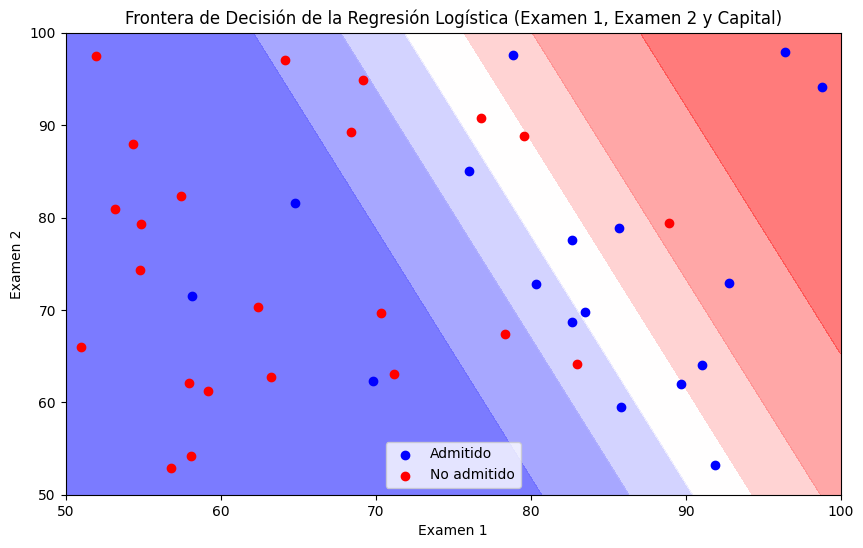

In [3]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

# Suprimir la advertencia de nombres de características
warnings.filterwarnings("ignore", category=UserWarning)

# Generar un conjunto de datos ficticio
np.random.seed(0)
n_samples = 200
exam1 = np.random.uniform(50, 100, n_samples)
exam2 = np.random.uniform(50, 100, n_samples)
economic_power = np.random.uniform(0, 10, n_samples)  # Capital entre 0 y 10 millones de euros
prep_history = np.random.choice([0, 1], n_samples)
admitted = (0.7 * exam1 + 0.3 * exam2 + 0.2 * economic_power + 0.2 * prep_history + np.random.normal(0, 5, n_samples)) > 70

# Aplicar la restricción: Capital menor de 2 millones de euros conlleva a no admisión
admitted[economic_power < 2] = 0

data = pd.DataFrame({'Examen1': exam1, 'Examen2': exam2, 'PoderEconomico': economic_power, 'Preparacion': prep_history, 'Admitido': admitted})

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['Examen1', 'Examen2', 'PoderEconomico', 'Preparacion']]
y = data['Admitido']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de regresión logística
clf = LogisticRegression()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Graficar la frontera de decisión
x1, x2 = np.meshgrid(np.linspace(50, 100, 100), np.linspace(50, 100, 100))
X_new = np.c_[x1.ravel(), x2.ravel()]
economic_power = np.full(X_new.shape[0], 2)  # Capital mínimo de 2 millones de euros
X_new = np.c_[X_new, economic_power]
prep_history = np.zeros(X_new.shape[0])  # Sin preparación
X_new = np.c_[X_new, prep_history]
y_proba = clf.predict_proba(X_new)
y_decision = y_proba[:, 1].reshape(x1.shape)

plt.figure(figsize=(10, 6))
plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.6)
plt.scatter(X_test[y_test == 1]['Examen1'], X_test[y_test == 1]['Examen2'], c='b', label="Admitido")
plt.scatter(X_test[y_test == 0]['Examen1'], X_test[y_test == 0]['Examen2'], c='r', label="No admitido")
plt.xlabel("Examen 1")
plt.ylabel("Examen 2")
plt.legend()
plt.title("Frontera de Decisión de la Regresión Logística (Examen 1, Examen 2 y Capital)")
plt.show()


Precisión del modelo: 0.88
Matriz de Confusión:
[[20  3]
 [ 2 15]]


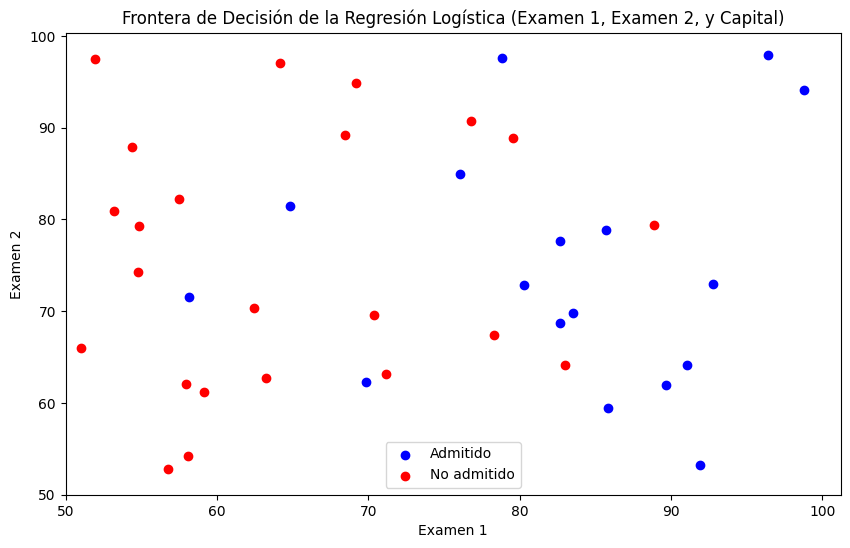

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

# Suprimir la advertencia de nombres de características
warnings.filterwarnings("ignore", category=UserWarning)

# Generar un conjunto de datos ficticio
np.random.seed(0)
n_samples = 200
exam1 = np.random.uniform(50, 100, n_samples)
exam2 = np.random.uniform(50, 100, n_samples)
economic_power = np.random.uniform(0, 10, n_samples)  # Capital entre 0 y 10 millones de euros
prep_history = np.random.choice([0, 1], n_samples)
admitted = (0.7 * exam1 + 0.3 * exam2 + 0.2 * economic_power + 0.2 * prep_history + np.random.normal(0, 5, n_samples)) > 70

# Aplicar la restricción: Capital menor de 2 millones de euros conlleva a no admisión
admitted[economic_power < 2] = 0

data = pd.DataFrame({'Examen1': exam1, 'Examen2': exam2, 'PoderEconomico': economic_power, 'Preparacion': prep_history, 'Admitido': admitted})

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['Examen1', 'Examen2', 'PoderEconomico', 'Preparacion']]
y = data['Admitido']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de regresión logística
clf = LogisticRegression()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Graficar la frontera de decisión
x1, x2, x3 = np.meshgrid(np.linspace(50, 100, 100), np.linspace(50, 100, 100), np.linspace(0, 10, 100))
X_new = np.c_[x1.ravel(), x2.ravel(), x3.ravel()]
prep_history = np.zeros(X_new.shape[0])  # Sin preparación
X_new = np.c_[X_new, prep_history]
y_proba = clf.predict_proba(X_new)
y_decision = y_proba[:, 1].reshape(x1.shape)

plt.figure(figsize=(10, 6))
plt.contourf(x1[0, 0, :], x2[0, :, 0], y_decision[0, :, :], cmap=plt.cm.bwr, alpha=0.6)
plt.scatter(X_test[y_test == 1]['Examen1'], X_test[y_test == 1]['Examen2'], c='b', label="Admitido")
plt.scatter(X_test[y_test == 0]['Examen1'], X_test[y_test == 0]['Examen2'], c='r', label="No admitido")
plt.xlabel("Examen 1")
plt.ylabel("Examen 2")
plt.legend()
plt.title("Frontera de Decisión de la Regresión Logística (Examen 1, Examen 2, y Capital)")
plt.show()


Precisión del modelo: 0.88
Matriz de Confusión:
[[20  3]
 [ 2 15]]


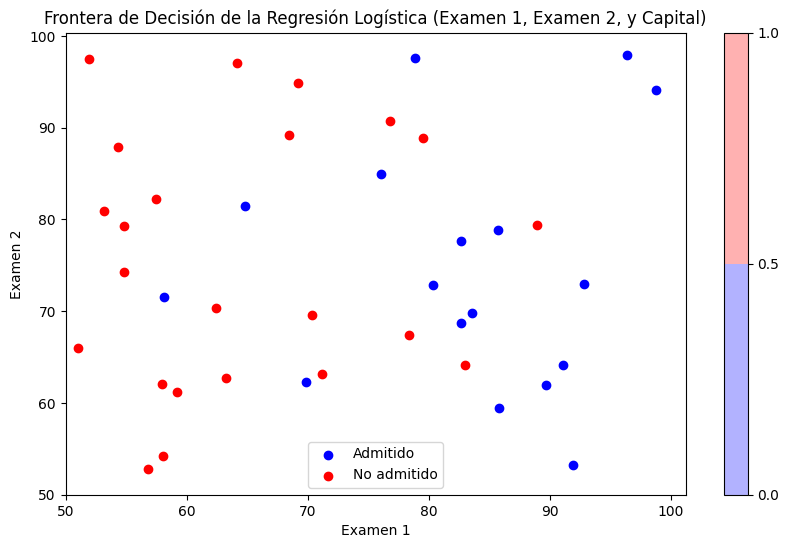

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

# Suprimir la advertencia de nombres de características
warnings.filterwarnings("ignore", category=UserWarning)

# Generar un conjunto de datos ficticio
np.random.seed(0)
n_samples = 200
exam1 = np.random.uniform(50, 100, n_samples)
exam2 = np.random.uniform(50, 100, n_samples)
economic_power = np.random.uniform(0, 10, n_samples)  # Capital entre 0 y 10 millones de euros
prep_history = np.random.choice([0, 1], n_samples)
admitted = (0.7 * exam1 + 0.3 * exam2 + 0.2 * economic_power + 0.2 * prep_history + np.random.normal(0, 5, n_samples)) > 70

# Aplicar la restricción: Capital menor de 2 millones de euros conlleva a no admisión
admitted[economic_power < 2] = 0

data = pd.DataFrame({'Examen1': exam1, 'Examen2': exam2, 'PoderEconomico': economic_power, 'Preparacion': prep_history, 'Admitido': admitted})

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['Examen1', 'Examen2', 'PoderEconomico', 'Preparacion']]
y = data['Admitido']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de regresión logística
clf = LogisticRegression()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Graficar la frontera de decisión
x1, x2, x3 = np.meshgrid(np.linspace(50, 100, 100), np.linspace(50, 100, 100), np.linspace(0, 10, 100))
X_new = np.c_[x1.ravel(), x2.ravel(), x3.ravel()]
prep_history = np.zeros(X_new.shape[0])  # Sin preparación
X_new = np.c_[X_new, prep_history]
y_proba = clf.predict_proba(X_new)
y_decision = y_proba[:, 1].reshape(x1.shape)

plt.figure(figsize=(10, 6))
contour = plt.contourf(x1[0, 0, :], x2[0, :, 0], y_decision[0, :, :], levels=[0, 0.5, 1], cmap=plt.cm.bwr, alpha=0.6)
plt.scatter(X_test[y_test == 1]['Examen1'], X_test[y_test == 1]['Examen2'], c='b', label="Admitido")
plt.scatter(X_test[y_test == 0]['Examen1'], X_test[y_test == 0]['Examen2'], c='r', label="No admitido")
plt.xlabel("Examen 1")
plt.ylabel("Examen 2")
plt.legend()
plt.title("Frontera de Decisión de la Regresión Logística (Examen 1, Examen 2, y Capital)")
plt.colorbar(contour)
plt.show()


Precisión del modelo: 0.88
Matriz de Confusión:
[[20  3]
 [ 2 15]]


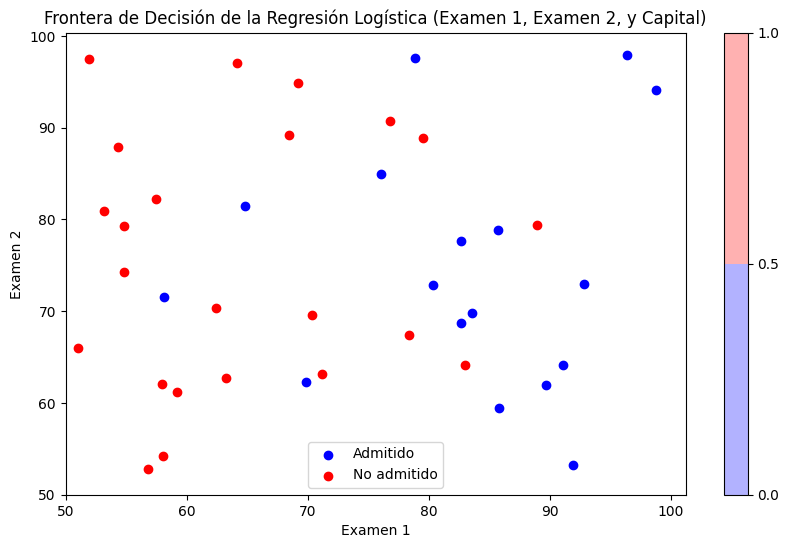

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

# Suprimir la advertencia de nombres de características
warnings.filterwarnings("ignore", category=UserWarning)

# Generar un conjunto de datos ficticio
np.random.seed(0)
n_samples = 200
exam1 = np.random.uniform(50, 100, n_samples)
exam2 = np.random.uniform(50, 100, n_samples)
economic_power = np.random.uniform(0, 10, n_samples)  # Capital entre 0 y 10 millones de euros
prep_history = np.random.choice([0, 1], n_samples)
admitted = (0.7 * exam1 + 0.3 * exam2 + 0.2 * economic_power + 0.2 * prep_history + np.random.normal(0, 5, n_samples)) > 70

# Aplicar la restricción: Capital menor de 2 millones de euros conlleva a no admisión
admitted[economic_power < 2] = 0

data = pd.DataFrame({'Examen1': exam1, 'Examen2': exam2, 'PoderEconomico': economic_power, 'Preparacion': prep_history, 'Admitido': admitted})

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['Examen1', 'Examen2', 'PoderEconomico', 'Preparacion']]
y = data['Admitido']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de regresión logística
clf = LogisticRegression()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Graficar la frontera de decisión
x1, x2, x3 = np.meshgrid(np.linspace(50, 100, 100), np.linspace(50, 100, 100), np.linspace(0, 10, 100))
X_new = np.c_[x1.ravel(), x2.ravel(), x3.ravel()]
prep_history = np.zeros(X_new.shape[0])  # Sin preparación
X_new = np.c_[X_new, prep_history]
y_proba = clf.predict_proba(X_new)
y_decision = y_proba[:, 1].reshape(x1.shape)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 1]['Examen1'], X_test[y_test == 1]['Examen2'], c='b', label="Admitido")
plt.scatter(X_test[y_test == 0]['Examen1'], X_test[y_test == 0]['Examen2'], c='r', label="No admitido")
plt.contourf(x1[0, 0, :], x2[0, :, 0], y_decision[0, :, :], levels=[0, 0.5, 1], cmap=plt.cm.bwr, alpha=0.6)
plt.xlabel("Examen 1")
plt.ylabel("Examen 2")
plt.legend()
plt.title("Frontera de Decisión de la Regresión Logística (Examen 1, Examen 2, y Capital)")
plt.colorbar()
plt.show()


Precisión del modelo: 0.88
Matriz de Confusión:
[[20  3]
 [ 2 15]]


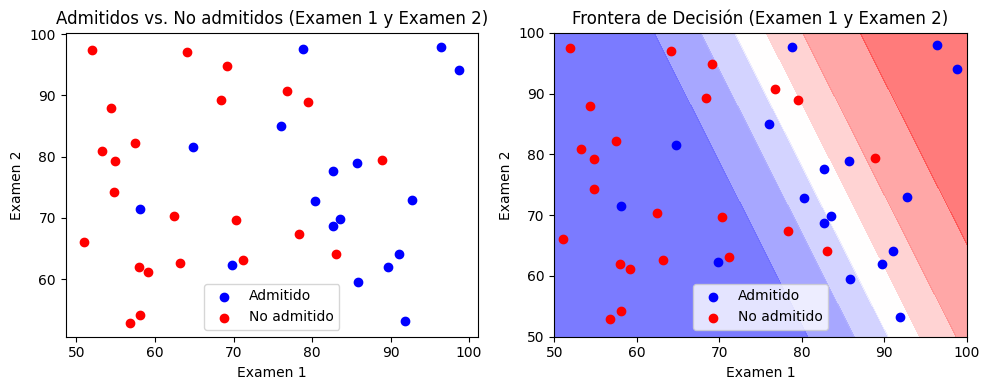

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

# Suprimir la advertencia de nombres de características
warnings.filterwarnings("ignore", category=UserWarning)

# Generar un conjunto de datos ficticio
np.random.seed(0)
n_samples = 200
exam1 = np.random.uniform(50, 100, n_samples)
exam2 = np.random.uniform(50, 100, n_samples)
economic_power = np.random.uniform(0, 10, n_samples)  # Capital entre 0 y 10 millones de euros
prep_history = np.random.choice([0, 1], n_samples)
admitted = (0.7 * exam1 + 0.3 * exam2 + 0.2 * economic_power + 0.2 * prep_history + np.random.normal(0, 5, n_samples)) > 70

# Aplicar la restricción: Capital menor de 2 millones de euros conlleva a no admisión
admitted[economic_power < 2] = 0

data = pd.DataFrame({'Examen1': exam1, 'Examen2': exam2, 'PoderEconomico': economic_power, 'Preparacion': prep_history, 'Admitido': admitted})

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['Examen1', 'Examen2', 'PoderEconomico', 'Preparacion']]
y = data['Admitido']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de regresión logística
clf = LogisticRegression()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# ...

# Gráfico de dispersión para admitidos (Examen 1 vs. Examen 2)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test == 1]['Examen1'], X_test[y_test == 1]['Examen2'], c='b', label="Admitido")
plt.scatter(X_test[y_test == 0]['Examen1'], X_test[y_test == 0]['Examen2'], c='r', label="No admitido")
plt.xlabel("Examen 1")
plt.ylabel("Examen 2")
plt.title("Admitidos vs. No admitidos (Examen 1 y Examen 2)")
plt.legend()

# Frontera de decisión para admitidos (Examen 1 y Examen 2)
x1, x2 = np.meshgrid(np.linspace(50, 100, 100), np.linspace(50, 100, 100))
X_new = np.c_[x1.ravel(), x2.ravel()]
economic_power = np.full(X_new.shape[0], 2)  # Capital mínimo de 2 millones de euros
prep_history = np.zeros(X_new.shape[0])  # Sin preparación
X_new = np.c_[X_new, economic_power, prep_history]
y_proba = clf.predict_proba(X_new)
y_decision = y_proba[:, 1].reshape(x1.shape)

plt.subplot(1, 2, 2)
plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.6)
plt.scatter(X_test[y_test == 1]['Examen1'], X_test[y_test == 1]['Examen2'], c='b', label="Admitido")
plt.scatter(X_test[y_test == 0]['Examen1'], X_test[y_test == 0]['Examen2'], c='r', label="No admitido")
plt.xlabel("Examen 1")
plt.ylabel("Examen 2")
plt.title("Frontera de Decisión (Examen 1 y Examen 2)")
plt.legend()

plt.tight_layout()
plt.show()
